In [1]:
"""
illegal(A,B,C,D,E,F):- C=E.
illegal(A,B,C,D,E,F):- D=F.
illegal(A,B,C,D,E,F):- adj(A,E), adj(B,F).

"""

'\nillegal(A,B,C,D,E,F):- C=E.\nillegal(A,B,C,D,E,F):- D=F.\nillegal(A,B,C,D,E,F):- adj(A,E), adj(B,F).\n\n'

In [2]:
0, 3

(0, 3)

In [3]:
import argparse
import sys

import torch
import torch.nn.functional as F

from crm.core import Network
from crm.utils import get_explanations, get_metrics, make_dataset_cli, train, seed_all

In [4]:
seed_all(24)

In [5]:
file_name = "./chess1.in"
with open(file_name, "r") as f:
    graph_file = f.readline()[:-1]
    train_file = f.readline()[:-1]
    test_files = f.readline()[:-1].split()
X_train, y_train, test_dataset, adj_list = make_dataset_cli(
    graph_file, train_file, test_files
)

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=None)
clf.fit(X_train[:, :23].numpy(), y_train.numpy())

DecisionTreeClassifier(random_state=0)

In [14]:
sum(clf.predict(X_train[:, :23].numpy())==y_train.numpy())

9553

In [15]:
X_test_1, y_test_1 = test_dataset[0]
X_test_2, y_test_2 = test_dataset[1]
X_test_3, y_test_3 = test_dataset[2]

In [16]:
sum(clf.predict(X_test_1[:, :23].numpy())==y_test_1.numpy())/len(y_test_1)

0.697226502311248

In [17]:
sum(clf.predict(X_test_2[:, :23].numpy())==y_test_2.numpy())/len(y_test_2)

1.0

In [18]:
sum(clf.predict(X_test_3[:, :23].numpy())==y_test_3.numpy())/len(y_test_3)

1.0

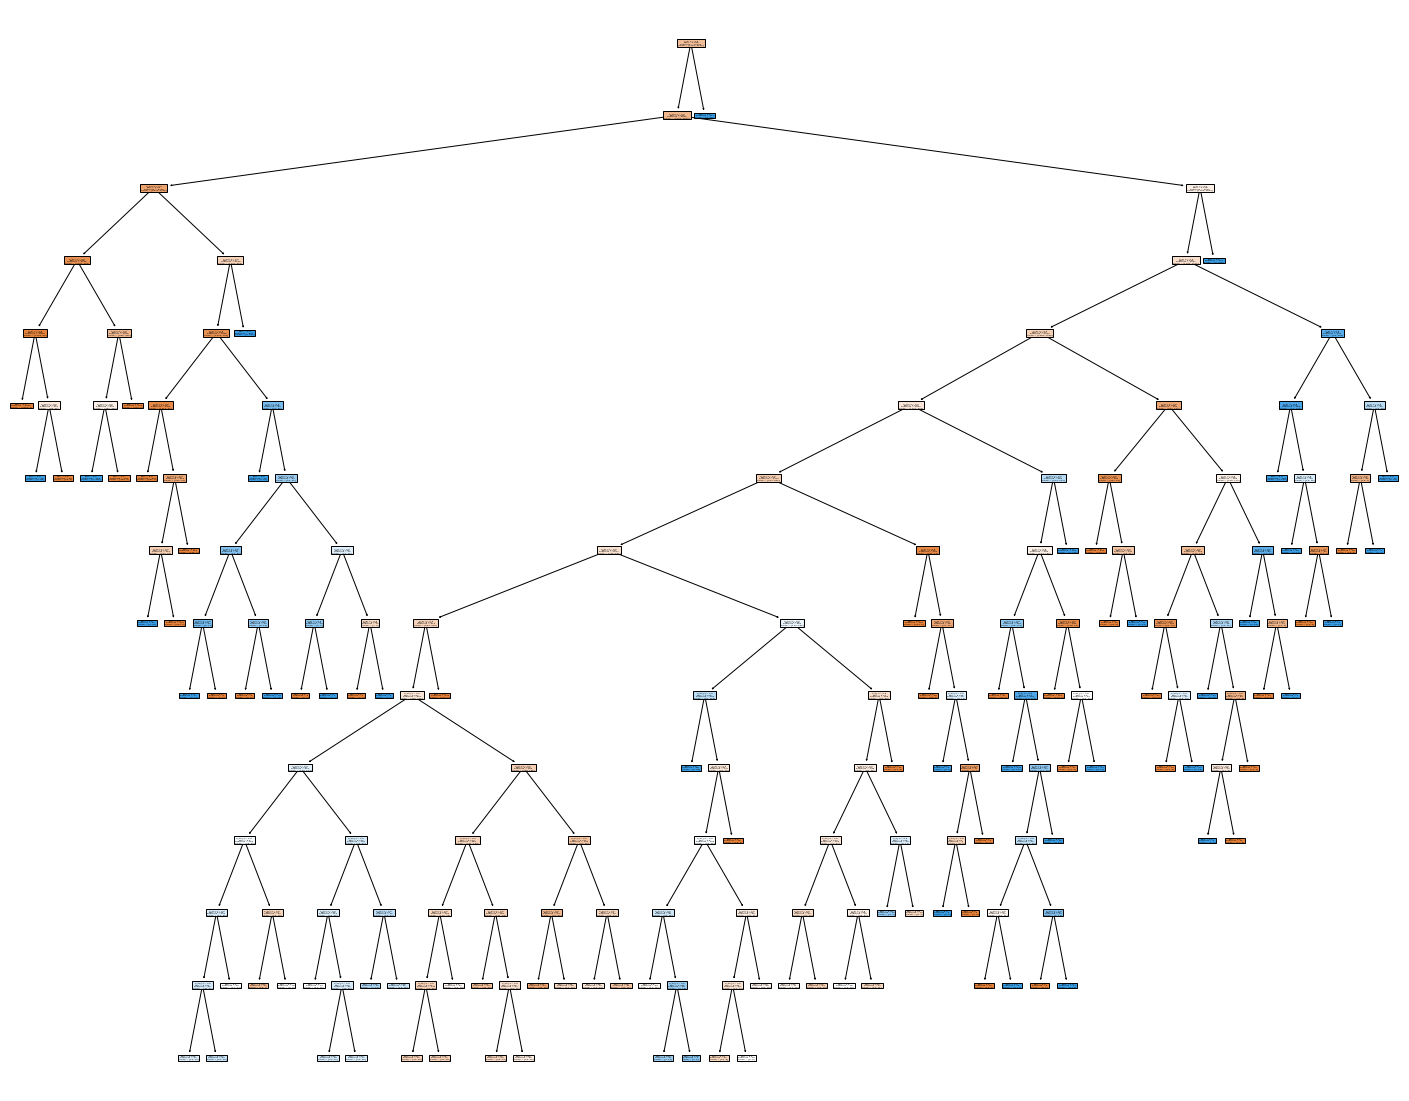

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)